<h1 style="font-size:3rem;color:Black;">  Section 3.3 Outliers  </h1>

## 1. Il vous faut une ligne par directeur/directrice, vous devez conserver également l’information suivante : nom et prénom, et créer une nouvelle variable : le nombre de thèses encadrées sur la période considérée(1984-2018).

In [1]:
import pandas as pd
import numpy as np
import datetime
data=pd.read_csv('PhD_v2.csv', on_bad_lines='skip',low_memory=False)
data.info()

dfsupervisors=pd.DataFrame(columns=['Directeur de these (nom prenom)','Year','Nombre de theses encardre(1984-2018)'])
dfsupervisors['Directeur de these (nom prenom)']=data['Directeur de these (nom prenom)']
dfsupervisors['Year']=data['Year']
dfsupervisors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

,Directeur de these (nom prenom),Year,Nombre de theses encardre(1984-2018)
0,Delebecque Philippe,NaN,NaN
1,"Grandidier Jean-Claude,Beringhier Marianne",NaN,NaN
2,Kohler Francois,1993.0,NaN
3,Pollet Gilles,NaN,NaN
4,Dupuy Gabriel,NaN,NaN


In [2]:
df_temp=pd.DataFrame()  
df_temp['Year']=data['Year']
df_temp['Supervis']=data['Directeur de these (nom prenom)']
df_temp['Discipline']=data['Discipline']
df_temp['Identifiant directeur']=data['Identifiant directeur'] 
df_temp['Etablissement de soutenance']=data['Etablissement de soutenance'] 
print('================')
print(df_temp.info())
print(df_temp.shape)
df =df_temp.loc[(df_temp.Year < 2019) & (df_temp.Year > 1983)] 
print('================')
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         390898 non-null  float64
 1   Supervis                     447629 non-null  object 
 2   Discipline                   447639 non-null  object 
 3   Identifiant directeur        447644 non-null  object 
 4   Etablissement de soutenance  447640 non-null  object 
dtypes: float64(1), object(4)
memory usage: 17.1+ MB
None
(447644, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 379109 entries, 2 to 447628
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         379109 non-null  float64
 1   Supervis                     379097 non-null  object 
 2   Discipline                   379109 non-null  object 
 3

### 1.1 Identifiez les nombre de these par superveur (coautheur non include)

In [9]:
supervisor=df['Supervis'].unique()
print('================')
print('there are totally  ' + str(len(supervisor)) + ' different supervisors during 1984-2018')

there are totally  129093 different supervisors during 1984-2018


In [8]:
number_charge=df.Supervis.value_counts().reset_index()
number_charge.columns=['Supervis','number_thesis_in_charge_1983_2019']

print(number_charge.info())
print(number_charge.head(30))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129092 entries, 0 to 129091
Data columns (total 2 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Supervis                           129092 non-null  object
 1   number_thesis_in_charge_1983_2019  129092 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB
None
                        Supervis  number_thesis_in_charge_1983_2019
0     Directeur de these inconnu                                711
1         Scherrmann Jean-Michel                                208
2            Blanc Francois-Paul                                201
3                  Brunel Pierre                                195
4                Bertucat Michel                                173
5                    Pujolle Guy                                172
6                Teyssie Bernard                                138
7                Lumley Henry de   

(array([391., 171.,  32.,  23.,  36.,   9.,  19.,  12.,  14.,   4.]),
 array([1985. , 1986.5, 1988. , 1989.5, 1991. , 1992.5, 1994. , 1995.5,
        1997. , 1998.5, 2000. ]),
 <BarContainer object of 10 artists>)

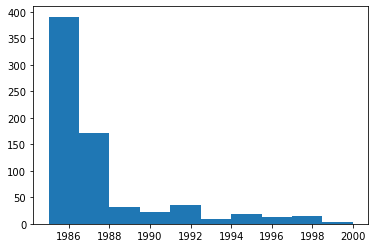

In [6]:
import matplotlib.pyplot as plt
year_unknownSup=df.loc[df.Supervis=='Directeur de these inconnu','Year']
plt.hist(year_unknownSup)

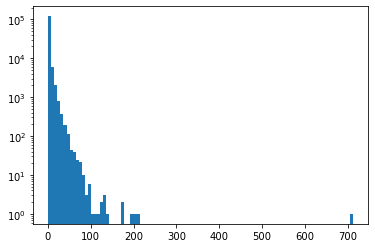

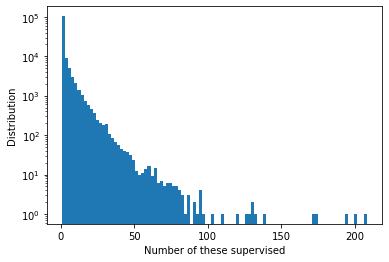

In [10]:
import matplotlib.pyplot as plt

n,edge,_=plt.hist(number_charge['number_thesis_in_charge_1983_2019'],bins=100,log=True)
plt.show()

n,edge,_=plt.hist(number_charge.loc[1:,'number_thesis_in_charge_1983_2019'],bins=100,log=True)
plt.xlabel('Number of these supervised')
plt.ylabel('Distribution')
plt.show()

### 1.2 Identifiez tous les individus

In [11]:
ProfList=df.loc[:, 'Supervis'].str.split(',').tolist()
print(  ProfList[1541] )   
print(  type(ProfList[1541][0])     )

print(len(  ProfList[1541]  )  )
print(len(  ProfList   )  )

##mthod 1
#AllProf = sum( ProfList , [])
#print( len(AllProf))

##method2
#AllProf = []
#for el in ProfList:
#    if str(el)!= 'nan':
#        AllProf.extend(el)

##method3
AllProf = []    
[ AllProf.extend( el )for el in ProfList if  str(el)!= 'nan' ] 

print(len( AllProf ))

['De meo Michel', 'Jammes Yves']
<class 'str'>
2
379109
455769


In [12]:
AllProf_unique = list(set( AllProf )) 
print( len(AllProf_unique ) )

from collections import Counter
DisPro=Counter(AllProf)
print(DisPro)
df_Pro = pd.DataFrame.from_dict(DisPro, orient='index').reset_index()
Pro = df_Pro.rename(columns={'index':'Name', 0:'count'})
print(Pro.sort_values(by=['count'], ascending=False))


101252
Counter({'Directeur de these inconnu': 711, 'Blanc Francois-Paul': 227, 'Scherrmann Jean-Michel': 209, 'Brunel Pierre': 206, 'Pujolle Guy': 196, 'Bertucat Michel': 173, 'Teyssie Bernard': 140, 'Lumley Henry de': 139, 'Maffesoli Michel': 136, 'Foucart Bruno': 135, 'Chaumeil Jean-Claude': 132, 'Bessiere Jean': 128, 'Boulu Roger G.': 127, 'Pageaux Daniel-Henri': 125, 'Meslin Michel': 124, 'Delebecque Philippe': 110, 'Molinie Georges': 107, 'Jezequel Louis': 101, 'Rey Pierre-Philippe': 100, 'Hamon Philippe': 100, 'Chiron Eliane': 96, 'Vincent Jean-Marie': 95, 'Jouanny Robert': 94, 'Cohen Paul R.': 94, 'Mioskowski Charles': 93, 'Berthomieu Claude': 92, 'Warnet Jean-Michel': 92, 'Balle Francis': 90, 'Mestre Jacques': 90, 'Deheuvels Paul': 90, 'Greiner Alain': 90, 'Raoult Didier': 87, 'Coquery-Vidrovitch Catherine': 87, 'Shahrour Isam': 86, 'Francois Frederic': 85, 'Jecko Bernard': 84, 'Thomas Louis-Vincent': 84, 'Ghibaudo Gerard': 84, 'Paturel Robert': 83, 'Pesqueux Yvon': 83, 'Lyon-C

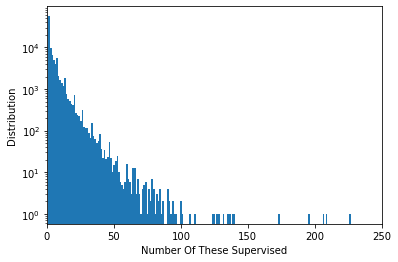

In [13]:
n,edge,_=plt.hist(Pro['count'],bins=600,log=True)
plt.xlim(0,250)
plt.xlabel('Number Of These Supervised')
plt.ylabel('Distribution')
plt.show()


In [36]:
Total= Pro['count'].sum()
print(Total)
print(Pro.shape[0])
OneTheisPro= Pro.loc[Pro['count'] == 1]
TwoTheisPro=Pro.loc[Pro['count'] == 2]
ThreTheisPro=Pro.loc[Pro['count'] == 3]
print( OneTheisPro.shape )
print( TwoTheisPro.shape )
print( ThreTheisPro.shape )
print( TwoTheisPro.shape[0]+OneTheisPro.shape[0]+ThreTheisPro.shape[0])


theserank=Pro['count'].value_counts()
print( theserank[0:30] )

455769
101252
(41150, 2)
(15071, 2)
(9495, 2)
65716
1     41150
2     15071
3      9495
4      6645
5      5079
6      3902
7      3180
8      2518
9      2056
10     1679
11     1373
12     1192
13      982
14      839
15      744
16      567
17      526
18      447
19      416
20      383
21      352
22      260
23      237
24      220
25      175
26      174
27      134
28      123
29      117
30      113
Name: count, dtype: int64


##  2.Identifiez les individus ayant encadré un nombre relativement anormal de thèses

### 2.1 san coautheur

In [14]:

print( df.info() )

print(df.loc[ (df['Supervis'].eq('Scherrmann Jean-Michel') )  ,['Supervis','Year','Identifiant directeur','Discipline' ]] )

ScherrmannJean=df.loc[ (df['Supervis'].eq('Scherrmann Jean-Michel'))  ,[ 'Identifiant directeur','Discipline','Etablissement de soutenance' ]] 
print(ScherrmannJean.head(10))

pivotTable=pd.pivot_table(ScherrmannJean,index='Identifiant directeur',columns=['Discipline','Etablissement de soutenance'], aggfunc=len, fill_value=0)
print(pivotTable.columns)
print(pivotTable.head())
print(ScherrmannJean['Discipline'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 379109 entries, 2 to 447628
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         379109 non-null  float64
 1   Supervis                     379097 non-null  object 
 2   Discipline                   379109 non-null  object 
 3   Identifiant directeur        379109 non-null  object 
 4   Etablissement de soutenance  379108 non-null  object 
dtypes: float64(1), object(4)
memory usage: 17.4+ MB
None
                      Supervis    Year Identifiant directeur  \
90380   Scherrmann Jean-Michel  2011.0              59375140   
91570   Scherrmann Jean-Michel  2001.0              59375140   
97927   Scherrmann Jean-Michel  2005.0              59375140   
98808   Scherrmann Jean-Michel  2008.0              59375140   
103898  Scherrmann Jean-Michel  1999.0              59375140   
...                        ...     

In [15]:
 
IDDiscip=df.loc[ (df['Supervis'].eq('Blanc Francois-Paul'))  ,[ 'Discipline']] 

print(IDDiscip.value_counts())
IDDir=df.loc[ (df['Supervis'].eq('Blanc Francois-Paul'))  ,[ 'Identifiant directeur']] 
 
######################################

BlancFrancois=df.loc[ (df['Supervis'].eq('Blanc Francois-Paul'))  ,[ 'Identifiant directeur','Discipline', 'Etablissement de soutenance' ]] 
print(BlancFrancois.head(10))

pivotTable=pd.pivot_table(BlancFrancois,index='Identifiant directeur',columns=['Discipline','Etablissement de soutenance'], aggfunc=len, fill_value=0)
print(pivotTable.columns)
print(pivotTable.head())




Discipline                           
Droit prive                              81
Droit                                    36
Droit prive et sciences criminelles      28
Droit public                             24
Histoire du droit et des institutions    15
Histoire du droit                        10
Droit compare                             3
Science politique                         2
Droit et sciences politiques              1
Droit prive. Droit musulman compare       1
dtype: int64
      Identifiant directeur                             Discipline  \
196                26730774                            Droit prive   
1083               26730774                            Droit prive   
59982              26730774                            Droit prive   
88980              26730774    Droit prive et sciences criminelles   
90516              26730774  Histoire du droit et des institutions   
93238              26730774                                  Droit   
97857              

### 2.2 avec coautheur

101252
Counter({'Directeur de these inconnu': 711, 'Blanc Francois-Paul': 227, 'Scherrmann Jean-Michel': 209, 'Brunel Pierre': 206, 'Pujolle Guy': 196, 'Bertucat Michel': 173, 'Teyssie Bernard': 140, 'Lumley Henry de': 139, 'Maffesoli Michel': 136, 'Foucart Bruno': 135, 'Chaumeil Jean-Claude': 132, 'Bessiere Jean': 128, 'Boulu Roger G.': 127, 'Pageaux Daniel-Henri': 125, 'Meslin Michel': 124, 'Delebecque Philippe': 110, 'Molinie Georges': 107, 'Jezequel Louis': 101, 'Rey Pierre-Philippe': 100, 'Hamon Philippe': 100, 'Chiron Eliane': 96, 'Vincent Jean-Marie': 95, 'Jouanny Robert': 94, 'Cohen Paul R.': 94, 'Mioskowski Charles': 93, 'Berthomieu Claude': 92, 'Warnet Jean-Michel': 92, 'Balle Francis': 90, 'Mestre Jacques': 90, 'Deheuvels Paul': 90, 'Greiner Alain': 90, 'Raoult Didier': 87, 'Coquery-Vidrovitch Catherine': 87, 'Shahrour Isam': 86, 'Francois Frederic': 85, 'Jecko Bernard': 84, 'Thomas Louis-Vincent': 84,

In [23]:
print(df.loc[ (df['Supervis'].eq('Brunel Pierre') )  ,['Supervis','Year','Identifiant directeur','Discipline' ]] )

BrunelPierre=df.loc[ (df['Supervis'].eq('Brunel Pierre'))  ,[ 'Identifiant directeur','Discipline','Etablissement de soutenance' ]] 
print(BrunelPierre.head(10))

pivotTable=pd.pivot_table(BrunelPierre,index='Identifiant directeur',columns=['Discipline','Etablissement de soutenance'], aggfunc=len, fill_value=0)
print(pivotTable.columns)
print(pivotTable.head())
print(BrunelPierre['Discipline'].unique())




             Supervis    Year Identifiant directeur             Discipline
3161    Brunel Pierre  1986.0              26756625   Litterature comparee
7863    Brunel Pierre  2001.0              26756625   Litterature comparee
14687   Brunel Pierre  2011.0              26756625   Litterature comparee
15122   Brunel Pierre  2010.0              26756625   Litterature comparee
26158   Brunel Pierre  2009.0              26756625   Litterature comparee
...               ...     ...                   ...                    ...
433483  Brunel Pierre  1986.0              26756625   Litterature comparee
434408  Brunel Pierre  1990.0              26756625  Litterature francaise
434737  Brunel Pierre  1997.0              26756625   Litterature comparee
435212  Brunel Pierre  1991.0              26756625   Litterature comparee
438296  Brunel Pierre  1993.0              26756625   Litterature comparee

[195 rows x 4 columns]
      Identifiant directeur               Discipline  \
3161               2

## 3. groupby ID directeur, displine


In [41]:
df['Identifiant directeur'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [38]:
pivotTable=pd.pivot_table(df,index='Identifiant directeur',columns='Discipline', aggfunc=len, fill_value=0)
print(pivotTable.columns)
print(pivotTable.head())

MemoryError: Unable to allocate 715. KiB for an array with shape (1, 91541) and data type float64

In [16]:
df.info

<bound method DataFrame.info of           Year                           Supervis  \
2       1993.0                    Kohler Francois   
5       2008.0                       Jouve Edmond   
6       2005.0                       Comte Pierre   
7       2009.0                     Sermet Laurent   
8       2013.0             Berger Anne-Emmanuelle   
...        ...                                ...   
447596  2018.0           Combaz Gilles,Dugas Eric   
447597  2015.0    Cantournet Sabine,Billon Noelle   
447612  2018.0  Verges Samuel,Doutreleau Stephane   
447622  2018.0                         Hot Pascal   
447628  2018.0       Panier Stephane,Franz Gerald   

                                               Discipline  \
2                                                Medecine   
5                                       Science politique   
6                                            Droit public   
7                                            Droit public   
8                         